In [1]:
# Импортирую нужные библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth

import seaborn as sns
import matplotlib.pyplot as plt

# Часть 1. Приоритизация гипотез.
Задача
- Применить фреймворк `ICE` для приоритизации гипотез.
- Применить фреймворк `RICE` для приоритизации гипотез. О
- Как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`.

In [2]:
# Посмотрю данные с гипотезами для первой части
hypothesis = pd.read_csv('hypothesis.csv')

display(hypothesis)

# Oписание гипотез не полные. Выведу полное описание гипотез
display(hypothesis['Hypothesis'].unique())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

## ICE

In [3]:
# Расчитаю ICE 
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'],2) # Округлю до 2х знаков

# Выведу на экран. Отсортировую их по убыванию приоритета
hypothesis.sort_values('ICE',ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Из расчета `ICE` видно что лучше гипотезы под номерами:
- 8. Запустить акцию, дающую скидку на товар в день рождения
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

---
## RICE

In [4]:
# Расчитаю RICE 
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

# Выведу на экран. Отсортировую их по убыванию приоритета
hypothesis.sort_values('RICE',ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


Из расчета `RICE` видно что лучше гипотезы под номерами:
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

---
При расчете `RICE` гипотеза под номером 7 стала на первое место т.к у неё большой обхват пользователей(`Reach`). 8 гипотеза же ушла в середину из-за маленького обхвата.

Так что лучше всего начать с 7 гипотезы и добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Потом лучше присмотреться к 0 гипотезе(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) т.к она входит в топ три по двум фреймворкам



---
# Часть 2. Анализ A/B-теста

In [5]:
# Посмотрю данные для второй части
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
# Сразу поменяю тип данных и название столбцов 
orders = orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'})

orders['transaction_id'] = orders['transaction_id'].astype(object)
orders['visitor_id'] = orders['visitor_id'].astype(object)
orders['date'] = pd.to_datetime(orders['date'])

visitors['date'] = pd.to_datetime(visitors['date'])


orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   object        
 1   visitor_id      1197 non-null   object        
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


In [7]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
# Проверю есть ли повторения.
for df in [orders,visitors]:
     print('Количество дубликатов в данных:',df.duplicated().sum())

Количество дубликатов в данных: 0
Количество дубликатов в данных: 0


## График кумулятивной выручки по группам.

In [9]:
# Создадим дф с уникальными парами значений
datesGroups = orders[['date','group']].drop_duplicates()

# Сделаю дф с кумулятивной выручкой и количеством пользователей и заказов
ordersAggregated = datesGroups.apply(
lambda x: orders[
    np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({
        'date' : 'max',
        'group' : 'max',
        'transaction_id' : 'nunique',
        'visitor_id' : 'nunique',
        'revenue' : 'sum'
    }),
    axis=1).sort_values(by=['date','group'])

ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


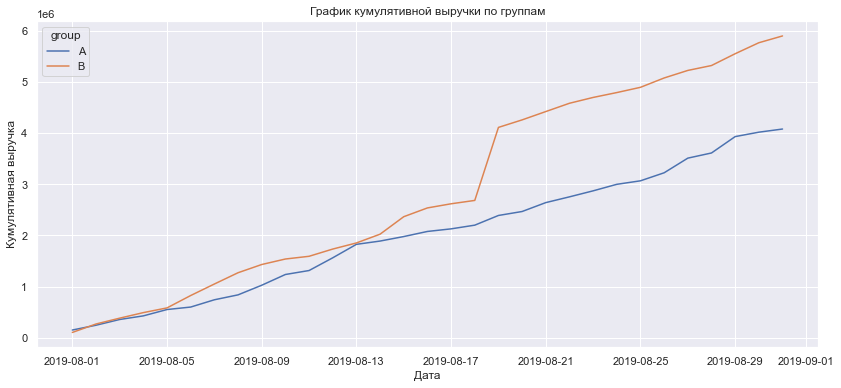

In [10]:
# Построю график кумулятивной выручки по группам
sns.set()

plt.figure(figsize=(14,6))

sns.lineplot(data = ordersAggregated, x = 'date', y = 'revenue', hue = 'group')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.show()

По данным видно что группа В лучше, но видно что в середине месяца у группы В есть высокий скачек. Возможно это выброс. Надо посмотреть более подробно данные.

---

## График кумулятивного среднего чека по группам

In [11]:
# Получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
lambda x: visitors[
    np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'
    }),
    axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные 
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

# Присваиваем  столбцам понятные названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


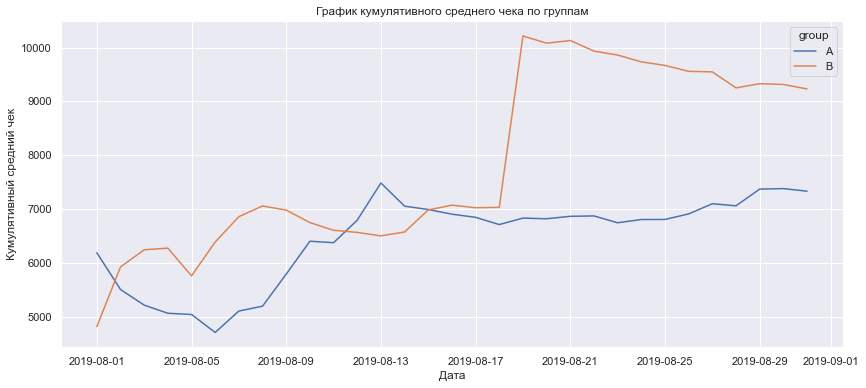

In [12]:
# Pазделим кумулятивную выручку на кумулятивное число заказов и таким образом получим кумулятивный средний чек
cumulativeData['mean_check'] = cumulativeData['revenue'] / cumulativeData['orders']

# График кумулятивного среднего чека по группам
plt.figure(figsize=(14,6))

sns.lineplot(data = cumulativeData, x = 'date', y = 'mean_check', hue = 'group')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.show()

Из данного графика так же видно что группа В после 17-08 сильно ушла вверх. Данные выбросы очень сильно повлияли на средний чек.

---
## График относительного изменения кумулятивного среднего чека группы B к группе A.

In [13]:
# Cобираем данные в одном датафрейме
mergedCummulativeRevenue = pd.merge(cumulativeData.query('group == "A"'),cumulativeData.query('group == "B"')
                                    ,on ='date',how = 'left', suffixes=['_A', '_B'])

mergedCummulativeRevenue.head() # Посмотрим что получилось

,date,group_A,orders_A,buyers_A,revenue_A,visitors_A,mean_check_A,group_B,orders_B,buyers_B,revenue_B,visitors_B,mean_check_B
0,2019-08-01,A,24,20,148579,719,6190.791667,B,21,20,101217,713,4819.857143
1,2019-08-02,A,44,38,242401,1338,5509.113636,B,45,43,266748,1294,5927.733333
2,2019-08-03,A,68,62,354874,1845,5218.735294,B,61,59,380996,1803,6245.836066
3,2019-08-04,A,84,77,425699,2562,5067.845238,B,78,75,489567,2573,6276.500000
4,2019-08-05,A,109,100,549917,3318,5045.110092,B,101,98,581995,3280,5762.326733


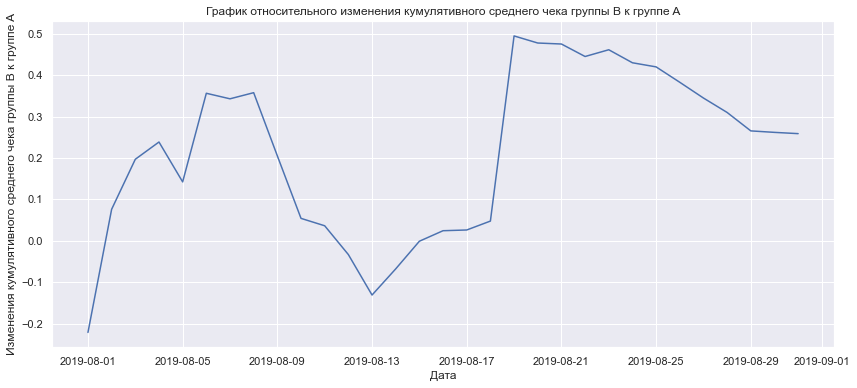

In [14]:
# Выведу график 
plt.figure(figsize=(14,6))

plt.plot(mergedCummulativeRevenue['date'], mergedCummulativeRevenue['mean_check_B']/mergedCummulativeRevenue['mean_check_A']-1)


plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Здесь тоже самое. Резкий подъем после 17-08. Надо убрать выбросы чтобы сказать более точно т.к из-за них можно сделать не правильные выводы.

---

## Построю график кумулятивной конверсии по группам

In [15]:
# Для начало сделаю для этого столбец c конверсией заказов
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors,mean_check,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,38,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,62,354874,1845,5218.735294,0.036856
...,...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,9327.848993,0.033657
58,2019-08-30,A,545,493,4022970,18037,7381.596330,0.030216
59,2019-08-30,B,620,567,5774631,18198,9313.920968,0.034070
60,2019-08-31,A,557,503,4084803,18736,7333.578097,0.029729


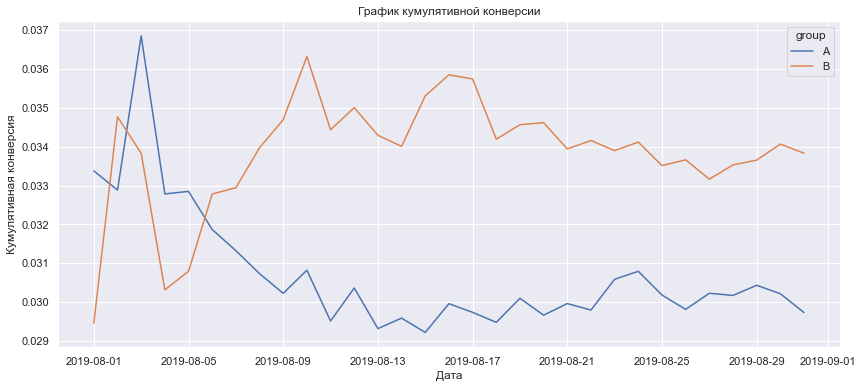

In [16]:
plt.figure(figsize=(14,6))

sns.lineplot(data = cumulativeData, x = 'date', y = 'conversion', hue = 'group')

plt.title('График кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.show()

По конверсии группа В лучше. Может 05-08 сделали какое то обновление и после этого группе В оно понравилось а группе А нет. Т.к. после 05-08 данные сильно разнятся 

---
##  Построю график относительного изменения кумулятивной конверсии группы B к группе A

In [17]:
# Для начала подсчитаю для каждой группы. Для этого сделаю цикл.
for x in ['A','B']:
    mergedCummulativeRevenue['conversion_'+x] = mergedCummulativeRevenue['buyers_'+x] / mergedCummulativeRevenue['visitors_'+x]

# Выведем на экран интересующие данные.    
mergedCummulativeRevenue[['date','buyers_A','visitors_A','conversion_A','buyers_B','visitors_B','conversion_B']].head(10)

,date,buyers_A,visitors_A,conversion_A,buyers_B,visitors_B,conversion_B
0,2019-08-01,20,719,0.027816,20,713,0.028050
1,2019-08-02,38,1338,0.028401,43,1294,0.033230
2,2019-08-03,62,1845,0.033604,59,1803,0.032723
3,2019-08-04,77,2562,0.030055,75,2573,0.029149
4,2019-08-05,100,3318,0.030139,98,3280,0.029878
5,2019-08-06,114,3985,0.028607,123,3935,0.031258
6,2019-08-07,131,4629,0.028300,146,4644,0.031438
7,2019-08-08,146,5239,0.027868,171,5298,0.032276
8,2019-08-09,159,5856,0.027152,193,5908,0.032668
9,2019-08-10,175,6262,0.027946,215,6277,0.034252


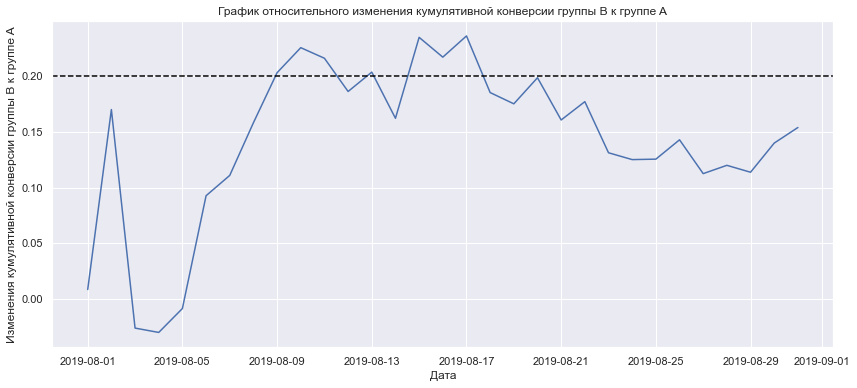

In [18]:
# Выведу график 
plt.figure(figsize=(14,6))

plt.plot(mergedCummulativeRevenue['date'], mergedCummulativeRevenue['conversion_B']/mergedCummulativeRevenue['conversion_A']-1)

plt.axhline(y= 0.2,color = 'black', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивной конверсии группы B к группе A')
plt.show()

После 05-08 у группы В конверсия возрасла на 20%. Скорее всего были внесены изменения которые увеличили конверсию в группе В или уменьшили в группе А. Или в этот день была какая-то аномалия в виде большого количества покупателей(возможно с одной компании)

---
## Tочечный график количества заказов по пользователям

In [19]:
# Cначало сгруппирую данные по д пользователю и посчитаю количество заказов
orders_by_users = orders.groupby('visitor_id')['transaction_id'].nunique().reset_index()

orders_by_users

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


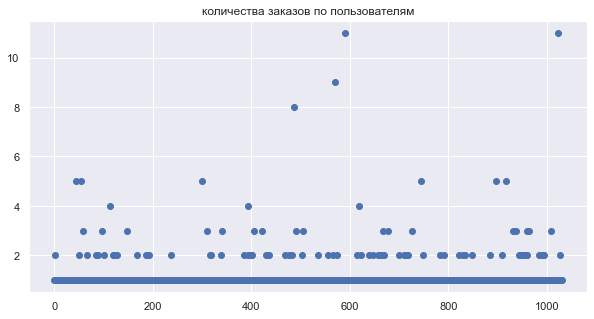

In [20]:
# Теперь сделаю график
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(10,5))
plt.title('количества заказов по пользователям')
plt.scatter(x_values, orders_by_users['transaction_id'])
plt.show()

Из графика видно что бОльшая часть пользователей покупает по 1-2 раза. Больше 3 уже редкость . Больше 10 всего 2 заказа. Возможно эти аномальные заказы и влияли на наши данные.

In [21]:
# Посмотрю перцентили количества заказов.
np.percentile(orders_by_users['transaction_id'],[95,98,99])

array([2., 3., 4.])

Видно что 99 % данные меньше или равны 4 заказам на клиена. Возьму за границу для определения аномальных пользователей количество равное 4 а всё что больше уберу.

---
## Точечный график стоимостей заказов

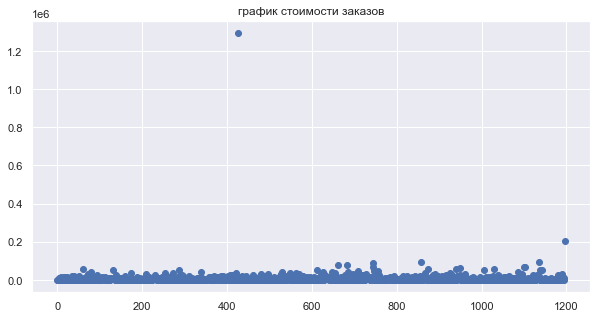

In [22]:
# Cделаю график
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.title('график стоимости заказов')
plt.scatter(x_values, orders['revenue'])
plt.show()

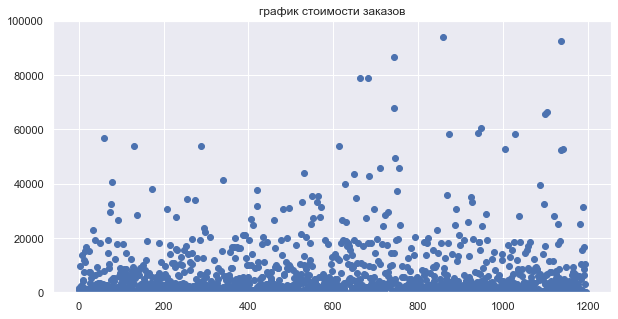

In [23]:
# Cделаю график но уже сделаю меньше значения по оси Y чтобы посмотреть более детально.
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.title('график стоимости заказов')
plt.ylim(0,100000)
plt.scatter(x_values, orders['revenue'])
plt.show()

Видно что есть выбросы больше 100тыс. а все бОльшая часть значений лежит в пределах 20 тыс. Теперь посмотрю на перцентили стоимости заказов.

In [24]:
np.percentile(orders['revenue'],[95,97,99])

array([28000. , 35485. , 58233.2])

Так же как и для количества заказов уберу 1 % данных т.е. всё что выше 58233.2 тыс.

---
## Статистическая значимость различий в конверсии между группами по «сырым» данным

In [25]:
# Начнём с подготовки данных
orders_by_users_A = orders.query('group == "A"').groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = orders.query('group == "B"').groupby('visitor_id').agg({'transaction_id' : 'nunique'}).reset_index()
orders_by_users_B.columns = ['user_id', 'orders']

display(orders_by_users_A.sample(5))
display(orders_by_users_B.sample(5))

,user_id,orders
291,2600415354,1
490,4144979507,1
393,3279802827,1
54,467022501,1
299,2652835245,1


,user_id,orders
293,2115666868,1
460,3332057097,2
338,2452603128,1
190,1396482013,1
134,938079215,1


In [26]:
sample_A = pd.concat(
    [orders_by_users_A['orders']
     ,pd.Series(0, index=np.arange(
         mergedCummulativeRevenue['visitors_A'].max() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

display(sample_A.sample(5))

sample_B = pd.concat(
    [orders_by_users_B['orders']
     ,pd.Series(0, index=np.arange(
         mergedCummulativeRevenue['visitors_B'].max() - len(orders_by_users_B['orders'])), name='orders')],axis=0)

display(sample_B.sample(5))

8863     0
11895    0
3292     0
5792     0
63       0
Name: orders, dtype: int64

5604     0
16353    0
7786     0
7946     0
13977    0
Name: orders, dtype: int64

In [27]:
print("{0:.5f}".format(st.mannwhitneyu(sample_A, sample_B)[1]))

print("{0:.3f}".format(
    (mergedCummulativeRevenue['orders_B'].max() / mergedCummulativeRevenue['visitors_B'].max())
                       /
    (mergedCummulativeRevenue['orders_A'].max() / mergedCummulativeRevenue['visitors_A'].max())-1))

0.00840
0.138


Н0 (Нулевая гипотеза) - между долями нет значимой разницы

Н1 (Альтернативная гипотеза) - между долями есть значимая разница

In [28]:
alpha = .05
p_value = st.mannwhitneyu(sample_A, sample_B)[1]

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

Отвергаем нулевую гипотезу: между долями есть значимая разница


Данные статистически значимы. Анализ сырых данных показывает что относительный прирост конверсии группы В к к группе А составляет почти 14% 

---
## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [29]:
print("{0:.3f}".format(
    st.mannwhitneyu(
        orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]))


print("{0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


Статистически значимых отличий нет , но относительное различие между чеками состовляет 25 % . Возможно дело в выбросах. Сейчас посмотрим на очищеных данных



---

## Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [30]:
# Для начала очищу данные. Для этого буду использовать переменные.
percentile_transaction_99 = np.percentile(orders_by_users['transaction_id'],99)
percentile_revenue_99 = np.percentile(orders['revenue'],99) 

# Сначало выведу ид пользователей кто входит в 1% по количеству заказов
usersWithManyOrders = pd.concat([orders_by_users_A.query('orders >= @percentile_transaction_99')['user_id'],
                                 orders_by_users_B.query('orders >= @percentile_transaction_99')['user_id']])

# выведу ид пользователей кто входит в 1% по чеку
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_revenue_99]['visitor_id']

# Объединю эти данные
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders]).drop_duplicates().sort_values()

abnormalUsers # выведу

1099     148427295
18       199603092
23       237748145
949      887908475
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
269     2378935119
278     2458001652
424     3062433592
501     3717692402
514     3803269165
940     4003628586
743     4133034833
499     4256040402
662     4266935830
dtype: object

In [31]:
# Теперь сделаю статистическую значимость различий в конверсии между группами по «очищенным» данным
sample_A_filtered = pd.concat(
    [orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(
         mergedCummulativeRevenue['visitors_A'].max() - len(orders_by_users_A['orders'])), name='orders')])

sample_B_filtered = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(
         mergedCummulativeRevenue['visitors_A'].max() - len(orders_by_users_A['orders'])), name='orders')],axis=0)


print("{0:.5f}".format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))

print("{0:.3f}".format(sample_B_filtered.mean() / sample_A_filtered.mean()-1))

0.00547
0.157


Н0 (Нулевая гипотеза) - между долями нет значимой разницы

Н1 (Альтернативная гипотеза) - между долями есть значимая разница

In [32]:
alpha = .05
p_value = st.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

Отвергаем нулевую гипотезу: между долями есть значимая разница


Как и с сырыми данными,статистическая значимость достигнута. Сегмент `В` лучше(15 %).

---
## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[
        np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()
    /
    orders[
        np.logical_and(orders['group']=='A',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.479
-0.014


Н0 (Нулевая гипотеза) - между долями нет значимой разницы

Н1 (Альтернативная гипотеза) - между долями есть значимая разница

In [34]:
alpha = .05
p_value = st.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По «очищенным» данным различия в среднем чеке между группами(B к группе A) показал что у группы А средний чек чуть больше.

---
## Решение по результатам теста:

Остановить тест, зафиксировать победу одной из групп. Победа группы `В`
 
Т.к различия были на сырых данных и на очищенных. Хоть средний чек групп примерно равен но конверсия у группы В выше. Возможно часть данных искажена т.к размер групп разный. В группе `В` на 16.5% больше.

In [35]:
print('Размер группы В по отношению к А: {:.2%}'.format(orders_by_users_B['user_id'].count() / orders_by_users_A['user_id'].count() -1))

Размер группы В по отношению к А: 16.50%


Из расчета `ICE` видно что лучше гипотезы под номерами:
- 8. Запустить акцию, дающую скидку на товар в день рождения
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Из расчета `RICE` видно что лучше гипотезы под номерами:
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

---
При расчете `RICE` гипотеза под номером 7 стала на первое место т.к у неё большой обхват пользователей(`Reach`). 8 гипотеза же ушла в середину из-за маленького обхвата.

Так что лучше всего начать с 7 гипотезы и добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Потом лучше присмотреться к 0 гипотезе(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) т.к она входит в топ три по двум фреймворкам

---

По кумулятивной выручке видно что группа В лучше, но видно что в середине месяца у группы В есть высокий скачек. Возможно это выброс. Надо посмотреть более подробно данные.

По графику кумулятивного среднего чека так же видно что группа В после 17-08 сильно ушла вверх. Данные выбросы очень сильно повлияли на средний чек.

По конверсии группа В лучше. Может 05-08 сделали какое то обновление и после этого группе В оно понравилось а группе А нет. Т.к. после 05-08 данные сильно разнятся


---
#### Статистическая значимость различий в конверсии между группами по «сырым» данным

Данные статистически значимы. Анализ сырых данных показывает что относительный прирост конверсии группы В к к группе А составляет почти 14% 

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Статистически значимых отличий нет , но относительное различие между чеками состовляет 25 % . Возможно дело в выбросах. Сейчас посмотрим на очищеных данных


#### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Как и с сырыми данными,статистическая значимость достигнута. Сегмент В лучше(15 %).

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

По «очищенным» данным различия в среднем чеке между группами(B к группе A) показал что у группы А средний чек чуть больше